# Vix Backwardation and the SPX

For a while I've been curious to see if there is any effect on a backwardated term structure in Vix Futures on future returns in the SPX.

####  Contago and Backwardation
<img src="http://www.cboeoptionshub.com/wp-content/uploads/2014/08/Contango-Fixed.jpg" title="Example of generic futures curve in contago and backwardation" width="500px">



#### A brief background on why this might be interesting...

The Vix measures the price that traders are willing to buy options to protect their portfolio. The spot Vix measures this price. You can buy futures on the VIX. Essentially you are making a bet where the Vix will settle on the date of expiration of the Vix future contract. At settlement you get paid the amount your future is worth. Thus, the futures trade off the price that traders think the index will be at settlement. In times of strees trader run to buy options, pushing the VIX up. Since the VIX is mean reverting this will pull the front month up more than the back month since traders figure that over time the VIX will return to is average levels of about 20. This term structure where the front month is greater than the back month is refered to as backwardation.

However, the "natural" term structure for Vix Futures is contango since they are somewhat tied to the price of SPX options which are naturally more expensive further out in time since there is more uncertainy in the future (even adjusted for time) -- this is why back month options trade at a higher vol (usually) than front month options.

During big downdrafts we see the VIX future curve go into steep backwardation. 

#### Here's the question:
Does this backwardation happen quickly enough into the drawdown to get you out?

In [1]:
import pandas as pd
import pandas.io.data as web
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn
from datetime import datetime, timedelta

%matplotlib inline

In [2]:
df = web.DataReader("^GSPC", 'yahoo', datetime(2000, 1, 1), datetime.today())

In [3]:
raw_vix_df = web.DataReader("^VIX", 'yahoo', datetime(2000, 1, 1), datetime.today())
raw_vix_df['vix_close'] = raw_vix_df['Close']
raw_vix_df = raw_vix_df['vix_close'] # drop all the HL shit

In [4]:
vix_df = pd.read_html("http://vixcentral.com/historical/?days=10000", header=0)[0]
vix_df = vix_df.drop(vix_df.index[-1:]) # get rid of last row
vix_df = vix_df.set_index('Date')
vix_df.index = pd.to_datetime(vix_df.index)

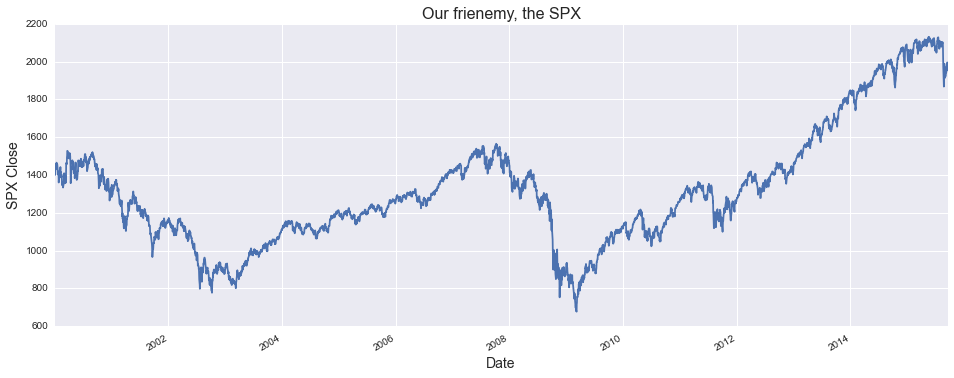

In [5]:
df['Close'].plot(figsize=(16, 6))
plt.xlabel('Date', fontsize=14)
plt.ylabel('SPX Close', fontsize=14)
plt.title("Our frienemy, the SPX", fontsize=16)

In [6]:
# calculate degree of backwardation between month 1 and 2
vix_df['f2-f1'] = vix_df['F2'] - vix_df['F1']
vix_df['backwardated'] = vix_df['f2-f1'] < 0

In [7]:
# join our tables and sort with date ascending
master = df.join(raw_vix_df, how='inner')
master = master.join(vix_df, how='inner')
master = master.sort_index()

In [8]:
# compute rolling returns for 1 day, 5 days, 2 weeks, 1 month, 3 months, 6 months and 12 months
# note this is tricky than it looks -- our dataframe is in acending order, 
# so pct_change(periods=1) calculates the chage from day1 to day2, but this change is aligned with day2 so 
# we *must* shift is back the same number of periods that the change is calculated over
master['1d'] = master['Close'].pct_change(periods=1).shift(-1) * 100
master['5d'] = master['Close'].pct_change(periods=5).shift(-5) * 100
master['10d'] = master['Close'].pct_change(periods=10).shift(-10) * 100
master['1m'] = master['Close'].pct_change(periods=20).shift(-20) * 100
master['3m'] = master['Close'].pct_change(periods=60).shift(-60) * 100
master['6m'] = master['Close'].pct_change(periods=120).shift(-120) * 100
master['12m'] = master['Close'].pct_change(periods=250).shift(-250) * 100

In [9]:
# verify the pecentage changes look good
master[["Close", "1d", "5d"]]

,Close,1d,5d
2009-10-23,1079.599976,-1.171733,-4.020937
2009-10-26,1066.949951,-0.331779,-2.255958
2009-10-27,1063.410034,-1.954094,-1.692668
2009-10-28,1042.630005,2.251995,0.371176
2009-10-29,1066.109985,-2.806469,0.048777
2009-10-30,1036.189941,0.645641,3.195371
2009-11-02,1042.880005,0.242600,4.813588
2009-11-03,1045.410034,0.104262,4.553235
2009-11-04,1046.500000,1.923555,4.969901
2009-11-05,1066.630005,0.250325,1.932253


In [10]:
# next we'll write a custom formatter
N = len(master.index)
ind = np.arange(N)  # the evenly spaced plot indices

def format_date(x, pos=None):
    thisind = np.clip(int(x+0.5), 0, N-2)
    print(thisind)
    return master.iloc[:thisind][0].format().pop()

In [11]:
print(master.iloc[:1].index.format().pop())

2009-10-23


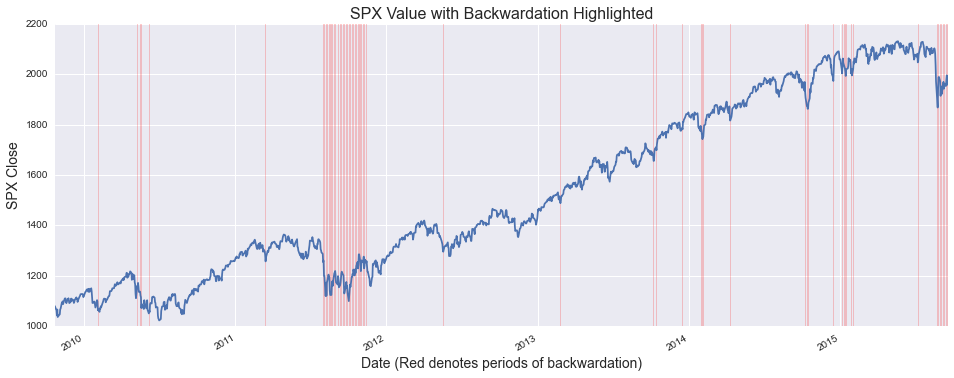

In [12]:
fig, ax = plt.subplots()
master['Close'].plot(ax=ax, figsize=(16, 6))
for idx, row in master.iterrows():
    if row['backwardated']:
        ax.axvspan(idx, idx+timedelta(days=1), facecolor='red', edgecolor='none', alpha=.2)
        
plt.xlabel('Date (Red denotes periods of backwardation)', fontsize=14)
plt.ylabel('SPX Close', fontsize=14)
plt.title("SPX Value with Backwardation Highlighted", fontsize=16)

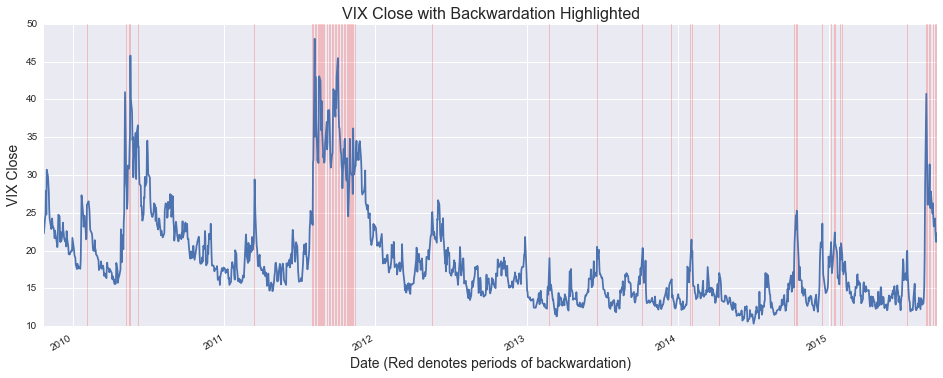

In [13]:
plot = master['vix_close'].plot(figsize=(16, 6))
for idx, row in master.iterrows():
    if row['backwardated']:
        plot.axvspan(idx, idx+timedelta(days=1), facecolor='red', edgecolor='none', alpha=.2)
        
plt.xlabel('Date (Red denotes periods of backwardation)', fontsize=14)
plt.ylabel('VIX Close', fontsize=14)
plt.title("VIX Close with Backwardation Highlighted", fontsize=16)

Now, lets dig into the data, segmenting periods of backwardation and contango on the VIX futures curve.

For each rolling return we'll:

1. Plot the SPX with the backwardation highlighted in red.
2. Plot the rolling return with the backwardation highlighted in red.
3. Look at some stats about the return distribution



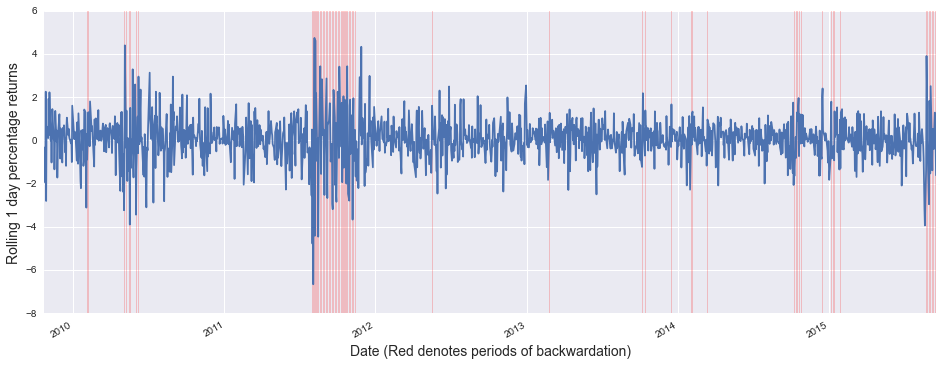

In [14]:
plot = master['1d'].plot(figsize=(16, 6))
for idx, row in master.iterrows():
    if row['backwardated']:
        plot.axvspan(idx, idx+timedelta(days=1), facecolor='red', edgecolor='none', alpha=.2)
        
plt.xlabel('Date (Red denotes periods of backwardation)', fontsize=14)
plt.ylabel('Rolling 1 day percentage returns', fontsize=14)

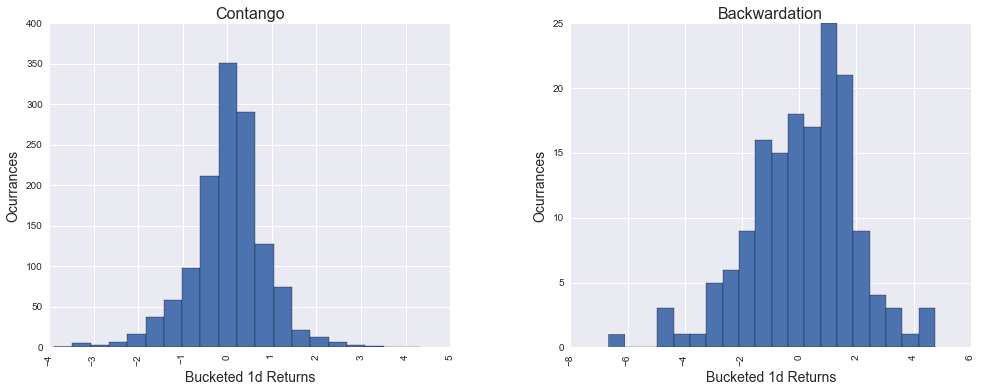

In [15]:
plt1, plt2 = master['1d'].hist(by=master['backwardated'], bins=20, figsize=(16, 6))

plt1.set_title("Contango", fontsize=16)
plt1.set_xlabel('Bucketed 1d Returns', fontsize=14)
plt1.set_ylabel('Ocurrances', fontsize=14)
plt2.set_title("Backwardation", fontsize=16)
plt2.set_xlabel('Bucketed 1d Returns', fontsize=14)
plt2.set_ylabel('Ocurrances', fontsize=14)

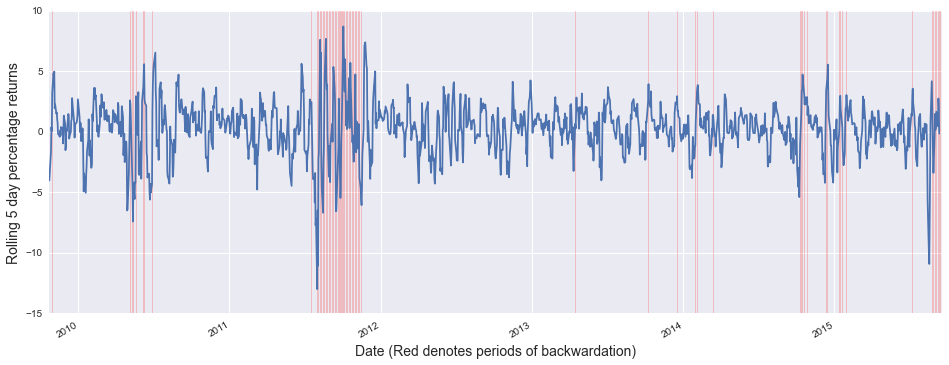

In [16]:
plot = master['5d'].plot(figsize=(16, 6))
for idx, row in master.iterrows():
    if row['backwardated']:
        plot.axvspan(idx, idx+timedelta(days=1), facecolor='red', edgecolor='none', alpha=.2)
        
plt.xlabel('Date (Red denotes periods of backwardation)', fontsize=14)
plt.ylabel('Rolling 5 day percentage returns', fontsize=14)

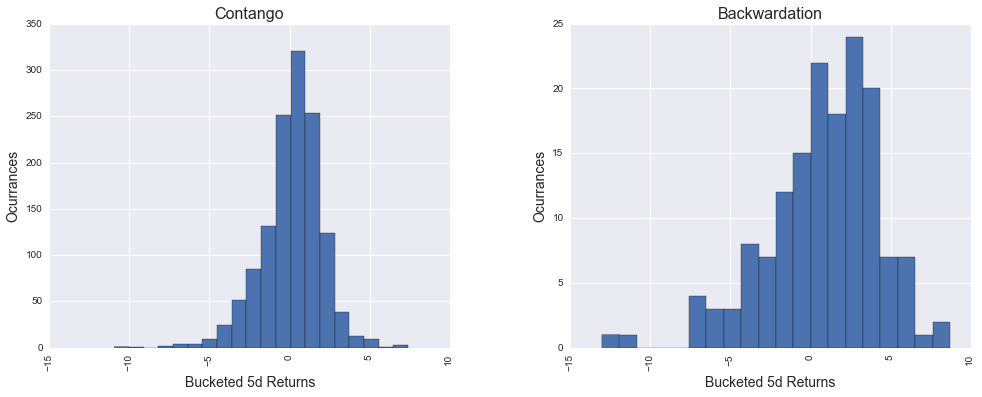

In [17]:
plt1, plt2 = master['5d'].hist(by=master['backwardated'], bins=20, figsize=(16, 6))

plt1.set_title("Contango", fontsize=16)
plt1.set_xlabel('Bucketed 5d Returns', fontsize=14)
plt1.set_ylabel('Ocurrances', fontsize=14)
plt2.set_title("Backwardation", fontsize=16)
plt2.set_xlabel('Bucketed 5d Returns', fontsize=14)
plt2.set_ylabel('Ocurrances', fontsize=14)

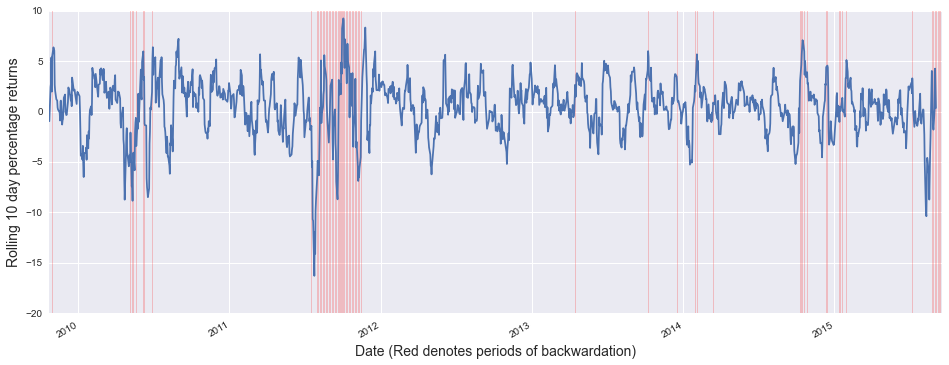

In [18]:
plot = master['10d'].plot(figsize=(16, 6))
for idx, row in master.iterrows():
    if row['backwardated']:
        plot.axvspan(idx, idx+timedelta(days=1), facecolor='red', edgecolor='none', alpha=.2)
        
plt.xlabel('Date (Red denotes periods of backwardation)', fontsize=14)
plt.ylabel('Rolling 10 day percentage returns', fontsize=14)

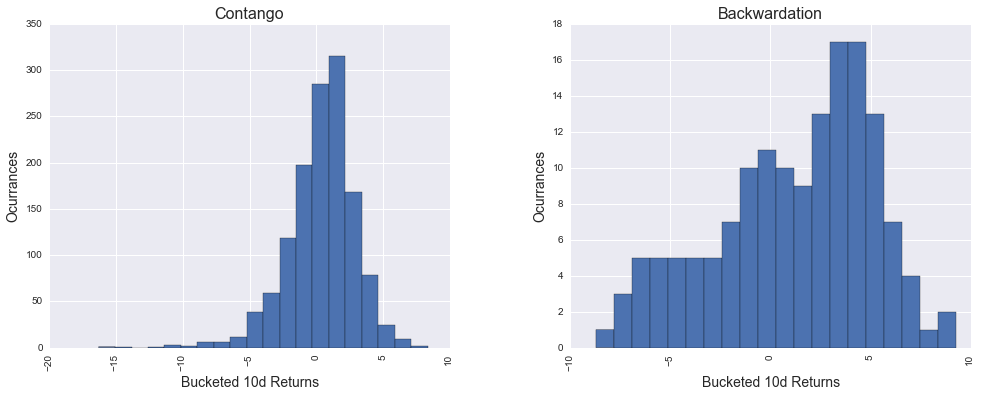

In [19]:
plt1, plt2 = master['10d'].hist(by=master['backwardated'], bins=20, figsize=(16, 6))

plt1.set_title("Contango", fontsize=16)
plt1.set_xlabel('Bucketed 10d Returns', fontsize=14)
plt1.set_ylabel('Ocurrances', fontsize=14)
plt2.set_title("Backwardation", fontsize=16)
plt2.set_xlabel('Bucketed 10d Returns', fontsize=14)
plt2.set_ylabel('Ocurrances', fontsize=14)

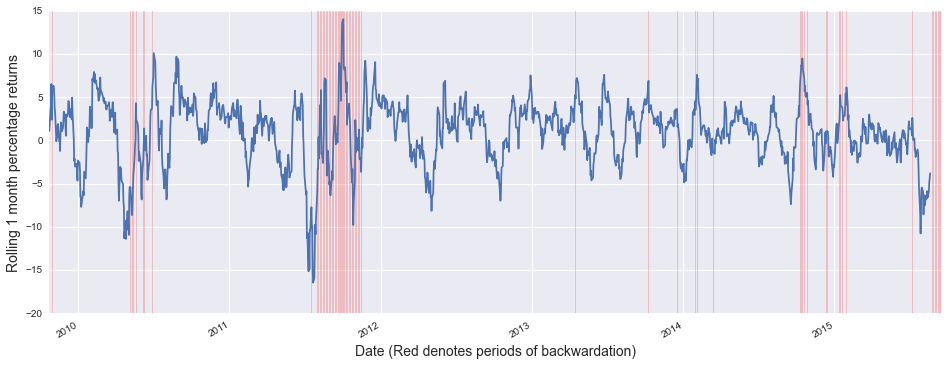

In [20]:
plot = master['1m'].plot(figsize=(16, 6))
for idx, row in master.iterrows():
    if row['backwardated']:
        plot.axvspan(idx, idx+timedelta(days=1), facecolor='red', edgecolor='none', alpha=.2)
        
plt.xlabel('Date (Red denotes periods of backwardation)', fontsize=14)
plt.ylabel('Rolling 1 month percentage returns', fontsize=14)

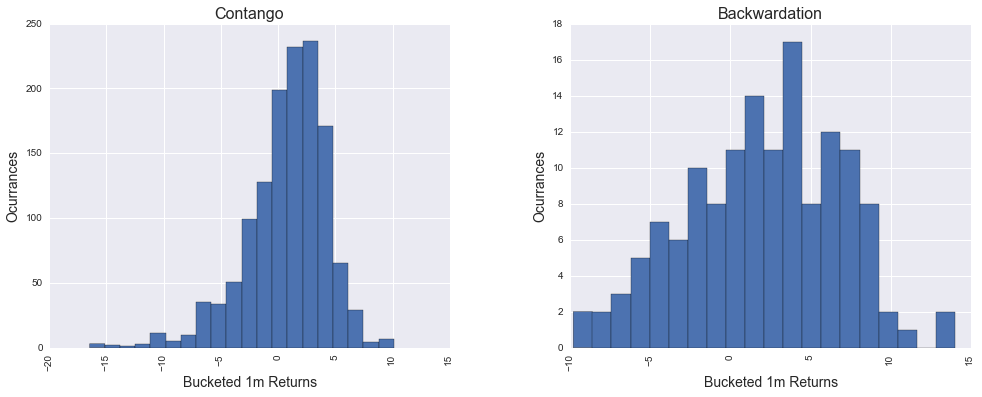

In [21]:
plt1, plt2 = master['1m'].hist(by=master['backwardated'], bins=20, figsize=(16, 6))

plt1.set_title("Contango", fontsize=16)
plt1.set_xlabel('Bucketed 1m Returns', fontsize=14)
plt1.set_ylabel('Ocurrances', fontsize=14)
plt2.set_title("Backwardation", fontsize=16)
plt2.set_xlabel('Bucketed 1m Returns', fontsize=14)
plt2.set_ylabel('Ocurrances', fontsize=14)

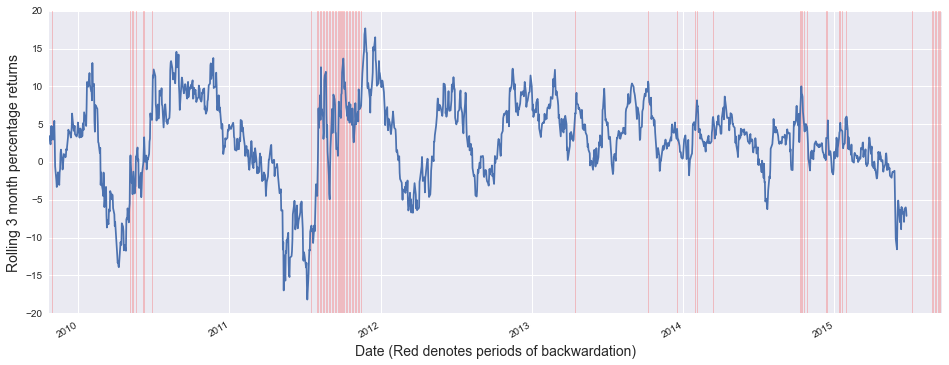

In [22]:
plot = master['3m'].plot(figsize=(16, 6))
for idx, row in master.iterrows():
    if row['backwardated']:
        plot.axvspan(idx, idx+timedelta(days=1), facecolor='red', edgecolor='none', alpha=.2)
        
plt.xlabel('Date (Red denotes periods of backwardation)', fontsize=14)
plt.ylabel('Rolling 3 month percentage returns', fontsize=14)

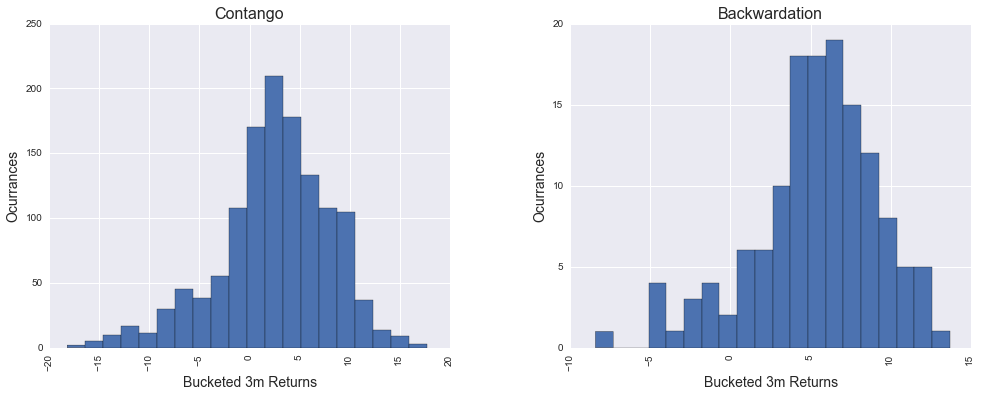

In [23]:
plt1, plt2 = master['3m'].hist(by=master['backwardated'], bins=20, figsize=(16, 6))

plt1.set_title("Contango", fontsize=16)
plt1.set_xlabel('Bucketed 3m Returns', fontsize=14)
plt1.set_ylabel('Ocurrances', fontsize=14)
plt2.set_title("Backwardation", fontsize=16)
plt2.set_xlabel('Bucketed 3m Returns', fontsize=14)
plt2.set_ylabel('Ocurrances', fontsize=14)

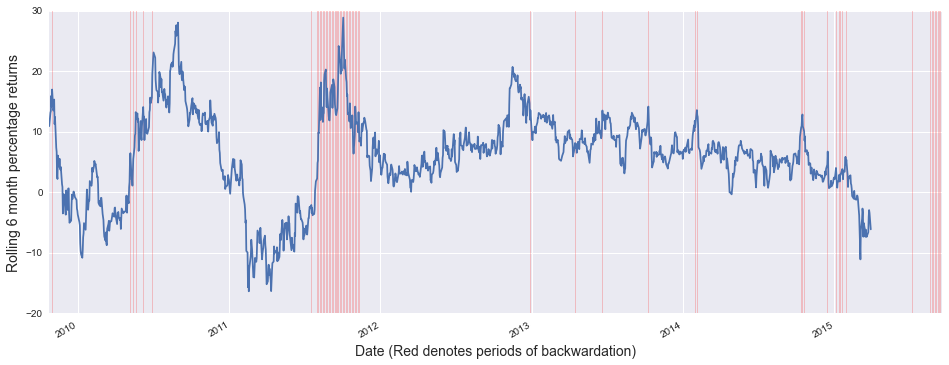

In [24]:
plot = master['6m'].plot(figsize=(16, 6))
for idx, row in master.iterrows():
    if row['backwardated']:
        plot.axvspan(idx, idx+timedelta(days=1), facecolor='red', edgecolor='none', alpha=.2)
        
plt.xlabel('Date (Red denotes periods of backwardation)', fontsize=14)
plt.ylabel('Rolling 6 month percentage returns', fontsize=14)

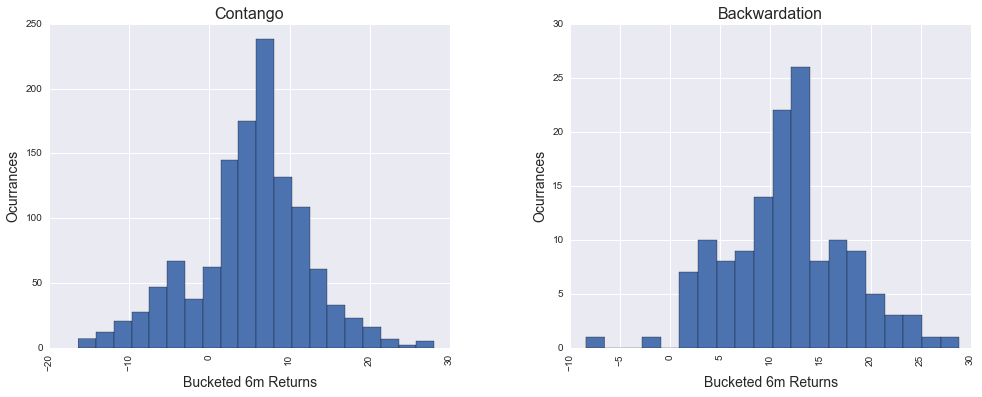

In [25]:
plt1, plt2 = master['6m'].hist(by=master['backwardated'], bins=20, figsize=(16, 6))

plt1.set_title("Contango", fontsize=16)
plt1.set_xlabel('Bucketed 6m Returns', fontsize=14)
plt1.set_ylabel('Ocurrances', fontsize=14)
plt2.set_title("Backwardation", fontsize=16)
plt2.set_xlabel('Bucketed 6m Returns', fontsize=14)
plt2.set_ylabel('Ocurrances', fontsize=14)

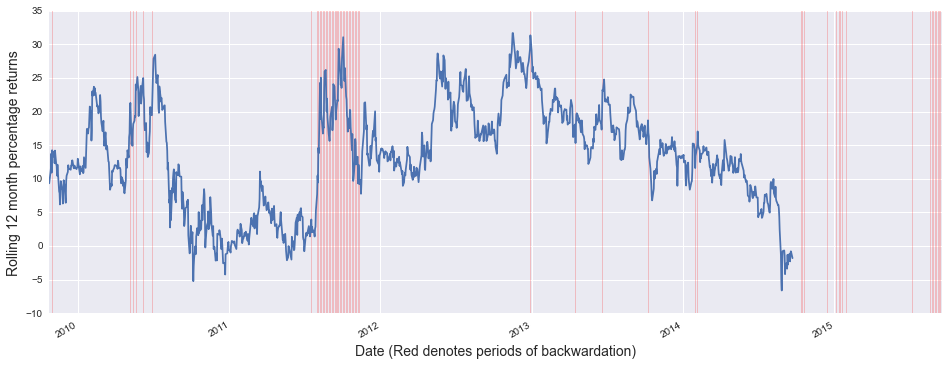

In [26]:
plot = master['12m'].plot(figsize=(16, 6))
for idx, row in master.iterrows():
    if row['backwardated']:
        plot.axvspan(idx, idx+timedelta(days=1), facecolor='red', edgecolor='none', alpha=.2)
        
plt.xlabel('Date (Red denotes periods of backwardation)', fontsize=14)
plt.ylabel('Rolling 12 month percentage returns', fontsize=14)

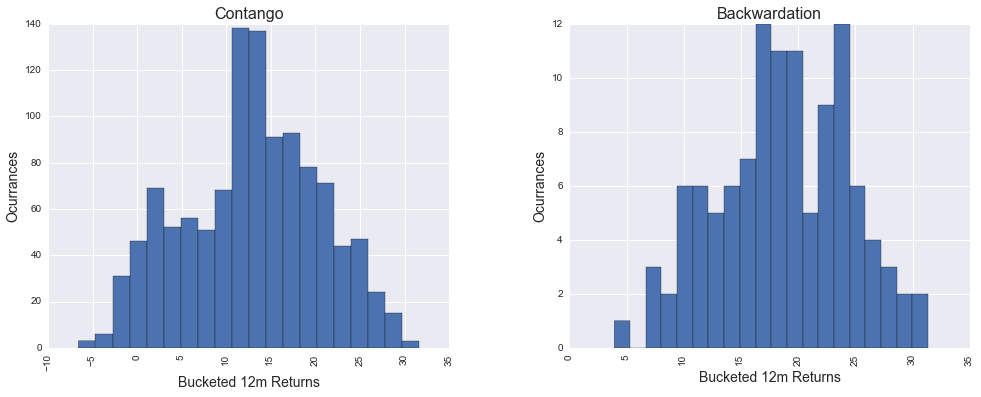

In [27]:
plt1, plt2 = master['12m'].hist(by=master['backwardated'], bins=20, figsize=(16, 6))

plt1.set_title("Contango", fontsize=16)
plt1.set_xlabel('Bucketed 12m Returns', fontsize=14)
plt1.set_ylabel('Ocurrances', fontsize=14)
plt2.set_title("Backwardation", fontsize=16)
plt2.set_xlabel('Bucketed 12m Returns', fontsize=14)
plt2.set_ylabel('Ocurrances', fontsize=14)

In [28]:
master.groupby(master['backwardated']).describe()[['vix_close', '1d','5d', '10d', '1m', '3m', '6m', '12m']]

vix_close           1d           5d          10d  \
backwardated                                                             
False        count  1327.000000  1327.000000  1326.000000  1326.000000   
             mean     17.152050     0.033411     0.164018     0.379796   
             std       4.397970     0.842642     1.884081     2.548827   
             min      10.320000    -3.897590   -10.935560   -16.297682   
             25%      13.795000    -0.373819    -0.709205    -0.954606   
             50%      16.270000     0.054917     0.354402     0.683488   
             75%      19.165000     0.491808     1.302859     1.966620   
             max      38.320000     4.331531     7.388642     8.330232   
True         count   159.000000   158.000000   155.000000   150.000000   
             mean     29.220755     0.143748     0.809551     1.154762   
             std       7.622389     1.877331     3.452738     3.929996   
             min      16.030001    -6.663446   -13.013815    -8.708650   
             25%      22.135001    -1.003537    -1.086628    -1.332970   
             50%      30.320000     0.452061     1.281145     1.912548   
             75%      34.519998     1.346590     3.063420     4.165109   
             max      48.000000     4.740685     8.702459     9.245563   

                             1m           3m           6m          12m  
backwardated                                                            
False        count  1326.000000  1288.000000  1228.000000  1123.000000  
             mean      0.765255     2.509253     5.171100    12.852408  
             std       3.521301     5.575858     7.116328     7.664303  
             min     -16.467412   -18.199885   -16.388027    -6.625103  
             25%      -1.092262    -0.257734     1.956702     7.345828  
             50%       1.342844     2.885028     5.915315    13.138006  
             75%       3.166168     6.252867     9.345582    18.298972  
             max      10.099940    17.674567    28.037405    31.675205  
True         count   140.000000   138.000000   138.000000   113.000000  
             mean      2.024101     5.274847    11.692221    18.640072  
             std       4.820032     4.010339     5.984883     5.695905  
             min      -9.802344    -8.418610    -8.417392     3.932781  
             25%      -1.444826     3.236077     7.804142    14.603315  
             50%       2.241605     5.770079    11.931472    18.907827  
             75%       5.755337     7.854694    14.441405    23.220777  
             max      14.016181    13.683218    28.863844    31.344876

## TLDR

So what did we see?

When the term structure of the **VIX is backwardated we see average returns across all time frames actually increase!** But, we also have a greater dispersion. This is pretty much a given, since when the VIX is backwadated the Vol level is elevated. We could show this is the case with a correlation analysis, but if you trade you already knew this.

Basically, this means it is a useless signal for the long-only equity trader. You might think that it's actually a inverse signal, but buying the wrong downdraft (i.e. 2008) and you don't get to play again.

For the options trader the question is more complicated since options are much more expensive during these periods, but the moves are much bigger too.

The main problem is that that data set for VIX futures is just too small! We only have ~150 days of backwadadion in the last 6 years. It's hardly enough to go on.

I'll be honest. I'm a premium seller and I'm nervous opening new positions right. Part of me says that this hesitancy is why these trades will pay out. So I'll probably sell some SPX strangles tomorrow, small.

That said, I'm still curious how returns would compare between the premium seller who goes flat during backwadation and the guy who holds on. My guess is that over this data set (2009-present) the guy who held on killed it. But, that same trader would have gotten killed in 2008-2009. I might try to model this using the buy-write index, so be on the lookout for that.

I'd also be curious to segment out the data with respect to the steepness of the curve (i.e., how are return when we are in 1% contago vs -5% backwardation vs 10% backwardation), but honestly you can't draw any good conclusions with this small dataset, so I'll skip it for now.